In [1]:
import numpy as np
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pickle
import csv
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split



import os
import cv2

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def plotIm(img_):
  plt.imshow(img_, cmap='gray')
  plt.show()

def toCategorical(labels_, numCategory):
    retY = np.zeros((labels_.shape[0], numCategory))
    for i in range(retY.shape[0]):
        retY[i,labels_[i]] =1
    return retY
def get_batch_next(X, Y, batch_size,ga):
    if ga == int(X.shape[0]/batch_size):
        ga = 0
    return ga+1,X[ga*batch_size : (ga+1)*batch_size, :],Y[ga*batch_size : (ga+1)*batch_size, :]

In [3]:
w, h = 128, 128
numCategory = 12
filIm = open('./image_uyir_128x128.obj', 'rb')
imagesP = pickle.load(filIm)
filLab = open('./label_uyir_128x128.obj', 'rb')
labelsP = pickle.load(filLab)

In [4]:
tamilCharacterCode = []
w,h=128,128
with open('./unicodeTamil.csv', newline='') as f:
  reader = csv.reader(f)
  data = list(reader)
  for i in data:
    go = i[1].split(' ')
    charL = ""
    for gg in go:
      charL = charL + "\\u"+str(gg)
    tamilCharacterCode.append(charL.encode('utf-8').decode('unicode-escape'))
print(tamilCharacterCode)

['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஃ', 'க', 'ங', 'ச', 'ஞ', 'ட', 'ண', 'த', 'ந', 'ப', 'ம', 'ய', 'ர', 'ல', 'வ', 'ழ', 'ள', 'ற', 'ன', 'ஸ', 'ஷ', 'ஜ', 'ஹ', 'க்ஷ', 'கி', 'ஙி', 'சி', 'ஞி', 'டி', 'ணி', 'தி', 'நி', 'பி', 'மி', 'யி', 'ரி', 'லி', 'வி', 'ழி', 'ளி', 'றி', 'னி', 'ஸி', 'ஷி', 'ஜி', 'ஹி', 'க்ஷி', 'கீ', 'ஙீ', 'சீ', 'ஞீ', 'டீ', 'ணீ', 'தீ', 'நீ', 'பீ', 'மீ', 'யீ', 'ரீ', 'லீ', 'வீ', 'ழீ', 'ளீ', 'றீ', 'னீ', 'ஸீ', 'ஷீ', 'ஜீ', 'ஹீ', 'க்ஷீ', 'கு', 'ஙு', 'சு', 'ஞு', 'டு', 'ணு', 'து', 'நு', 'பு', 'மு', 'யு', 'ரு', 'லு', 'வு', 'ழு', 'ளு', 'று', 'னு', 'கூ', 'ஙூ', 'சூ', 'ஞூ', 'டூ', 'ணூ', 'தூ', 'நூ', 'பூ', 'மூ', 'யூ', 'ரூ', 'லூ', 'வூ', 'ழூ', 'ளூ', 'றூ', 'னூ', 'ா', 'ெ', 'ே', 'ை', 'ஸ்ரீ', 'ஸு', 'ஷு', 'ஜு', 'ஹு', 'க்ஷு', 'ஸூ', 'ஷூ', 'ஜ0BC2', 'ஹூ', 'க்ஷூ', 'க்', 'ங்', 'ச்', 'ஞ்', 'ட்', 'ண்', 'த்', 'ந்', 'ப்', 'ம்', 'ய்', 'ர்', 'ல்', 'வ்', 'ழ்', 'ள்', 'ற்', 'ன்', 'ஸ்', 'ஷ்', 'ஜ்', 'ஹ்', 'க்ஷ்', 'ஔ']


In [5]:
images=np.array(imagesP)[:,:,:,0]
images=images.reshape(images.shape[0], w*h)
labels=np.array(labelsP,dtype=np.uint8)
y_labels=toCategorical(labels, numCategory)
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)

(4455, 16384) (4455, 12)


அ


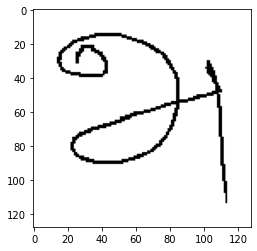

In [6]:
ridx = np.random.randint(X_train.shape[0])
print(tamilCharacterCode[np.argmax(y_train[ridx])])
plotIm(X_train[ridx].reshape(w,h))

In [7]:
batch_size = 300
num_steps = 200
learning_rate = 0.01
display_step = 50

In [8]:
n_hidden_1 = 300

weights = {
    'wc1' : tf.Variable(tf.random_normal([5, 5, 1, 64])),
    'wc2' : tf.Variable(tf.random_normal([5, 5, 64, 32])),
    'wc3' : tf.Variable(tf.random_normal([5, 5, 32, 32])),
    'wc4' : tf.Variable(tf.random_normal([5, 5, 32, 32])),

    'h1': tf.Variable(tf.random_normal([5*5*32, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, numCategory]))

}
biases = {
    'bc1': tf.Variable(tf.random_normal([64])),
    'bc2': tf.Variable(tf.random_normal([32])),
    'bc3': tf.Variable(tf.random_normal([32])),
    'bc4': tf.Variable(tf.random_normal([32])),

    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([numCategory]))
}

In [9]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)
def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')
def model(X,Y,w,h,weights,biases):
    x = tf.reshape(X, shape=[-1, w, h, 1])
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    maxP1 = maxpool2d(conv1)
    conv2 = conv2d(maxP1, weights['wc2'], biases['bc2'])
    maxP2 = maxpool2d(conv2)
    conv3 = conv2d(maxP2, weights['wc3'], biases['bc3'])
    maxP3 = maxpool2d(conv3)
    conv4 = conv2d(maxP3, weights['wc4'], biases['bc4'])
    maxP4 = maxpool2d(conv4)

    flatternIT = tf.reshape(maxP4, [-1, weights['h1'].get_shape().as_list()[0]])

    layer_1 = tf.add(tf.matmul(flatternIT, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']

    return out_layer

In [10]:
X = tf.placeholder(tf.float32, [None, w*h])
Y = tf.placeholder(tf.float32, [None, numCategory])

logits = model(X,Y,w,h,weights, biases)
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()

In [11]:
def TrainingAccuracy(sess):
    sss = 0
    ga = 0
    total = 0
    for i in range(int(X_train.shape[0]/batch_size)):
        ga, batch_x, batch_y = get_batch_next(X_train, y_train, batch_size, ga)
        trainacc = sess.run(accuracy, feed_dict={X: batch_x, Y: batch_y})
        total += batch_size
        sss = sss + trainacc
    return (sss*100.0/total)

In [37]:
with tf.Session() as sess:
    sess.run(init)
    ga = 0
    for step in range(1, num_steps+1):
        ga, batch_x, batch_y = get_batch_next(X_train, y_train, batch_size, ga)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        # print(step, TrainingAccuracy(sess))
        # if step % display_step == 0 or step == 1:
        #     print(step, TrainingAccuracy(sess))
    saver = tf.train.Saver() 
    saver.save(sess, './saved_sess.chkp')
    # print("Step " + str(step) + ", Minibatch Loss= " + \
    #         "{:.4f}".format(loss) + ", Accuracy[Batch, Training, Testing] = [" + \
    #         "{:.3f}".format(batchacc) + ", "  + \
    #         "{:.3f}".format(trainacc) + ", " + \
    #         "{:.3f}".format(testacc) + "]") 

In [38]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, 'saved_sess.chkp')

    
    trainacc = sess.run(accuracy, feed_dict={X: batch_x, Y: batch_y})
        
    print(trainacc)
    # for i in xrange(10):
    #     ga, batch_x, batch_y = get_batch_next(X_train, y_train, batch_size, ga)
    #     trainacc = sess.run(accuracy, feed_dict={X: X_train, Y: y_train})
    #     testacc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})


INFO:tensorflow:Restoring parameters from saved_sess.chkp


INFO:tensorflow:Restoring parameters from saved_sess.chkp


0.02896825419295402
